# Projet AlgoDS : école CentraleSupelec 2021-2022

![CentraleSupelec Logo](https://www.centralesupelec.fr/sites/all/themes/cs_theme/medias/common/images/intro/logo_nouveau.jpg)

Here the aim is to study the inout csv which nothing else than the input.csv file and output.csv file merged. Here we would like to explore the dataset and discover pattern in this timeseries. Whereas the ENS challenge was about timeseries classification, here we would like to do time series forecasting knowing the class of the time series. In other words, we have to predict the comsumption at d+2 knowing the consumer. 

# Modules and stuffs

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
import scipy.stats as sct
from sklearn import preprocessing

# Data exploration

## Dataset $\mathcal{D}$ in short

# to delete when working

In [47]:
def getxy(hour):
    x = math.sin((180 - hour * 15)/180 * 3.141)
    y = math.cos((180 - hour * 15)/180 * 3.141)
    return x, y

def keep_relevant_features(df):
    targets = ['RES1_BASE', 'RES11_BASE','PRO1_BASE', 'RES2_HC', 'RES2_HP', 'PRO2_HC', 'PRO2_HP']
    myfeatures=df.columns
    correlation=df.corr()
    colonnes=df.columns
    for ligne in colonnes:
        for col in colonnes:
            if 0.9<abs(correlation[ligne][col])<1:
                if col in myfeatures and col not in targets:
                    myfeatures=myfeatures.drop(col)
            elif correlation[ligne][col]==1:
                break
    for col in df.columns:
        if col not in myfeatures: 
            df=df.drop(columns=[col])
    return df
    
def symetric(df_reduced):
    list_to_box=[]
    list_quantile=[]
    targets = ['RES1_BASE', 'RES11_BASE','PRO1_BASE', 'RES2_HC', 'RES2_HP', 'PRO2_HC', 'PRO2_HP']
    for feature in df_reduced.columns.drop(targets):
        skew=sct.skew(df_reduced[feature])
        plt.figure()
        plt.hist(df_reduced[feature], bins=20,label=skew)
        #plt.title (feature)
        #plt.legend()
        #plt.show()
        if abs(skew)>1:
            list_to_box.append(feature)
        else:
            list_quantile.append(feature)
    for elt in list_to_box:
        yj = PowerTransformer(method='yeo-johnson')
        data = np.array(df_reduced[elt])
        reshaped_data = np.array(data).reshape(-1, 1)
        yj.fit(reshaped_data)
        df_reduced[elt] = yj.transform(reshaped_data)
        
    rng = np.random.RandomState(304)  
    for elt in list_quantile:
        qt = QuantileTransformer(output_distribution='normal',random_state=rng)
        data = np.array(df_reduced[elt])
        reshaped_data = np.array(data).reshape(-1, 1)
        qt.fit(reshaped_data)
        df_reduced[elt] = qt.transform(reshaped_data)
    return df_reduced

def encodage(df):
    
    df_indexed=df.set_index("Horodate_UTC")
    df_indexed.index = pd.to_datetime(df.set_index("Horodate_UTC").index)
    return df_indexed


def feature_engineering(df_indexed):
    df_indexed.drop(["Mois","IDS","Horodate"],inplace=True,axis=1)
    df_indexed = keep_relevant_features(df_indexed)
    df_indexed = symetric(df_indexed)
    print(len(df_indexed.columns))
    ss= preprocessing.StandardScaler()
    targets = ['RES1_BASE', 'RES11_BASE','PRO1_BASE', 'RES2_HC', 'RES2_HP', 'PRO2_HC', 'PRO2_HP']
  
    df_indexed=pd.DataFrame(ss.fit_transform(df_indexed.drop(targets,axis=1)),columns=df_indexed.drop(targets,axis=1).columns)
    print(df_indexed)
    df_indexed["Year"]=df_indexed.index.year
    df_indexed["Month"]=df_indexed.index.month.map(lambda x : np.cos(x*2*np.pi/12))
    df_indexed["Day"]=df_indexed.index.day.map(lambda x : np.cos(x*2*np.pi/31))
    df_indexed["Week_day"]=df_indexed.index.weekday.map(lambda x : np.cos(x*2*np.pi/7))
    df_indexed["Hour_X"],df_indexed["Hour_Y"]=zip(*pd.Series(df_indexed.index.hour).apply(getxy))
    return df_indexed

In [48]:
df = pd.read_csv("../dataset/inout.csv")

In [49]:
df=encodage(df)
targets=['RES1_BASE', 'RES11_BASE','PRO1_BASE', 'RES2_HC', 'RES2_HP', 'PRO2_HC', 'PRO2_HP']

/opt/anaconda3/envs/mds_env/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


16
       Consommation PME-PMI profilée (W)  \
0                              -1.555886   
1                              -1.636589   
2                              -1.849006   
3                              -2.247165   
4                              -2.286380   
...                                  ...   
70123                          -0.557611   
70124                          -0.682723   
70125                          -0.934614   
70126                          -1.058876   
70127                          -1.243792   

       Consommation professionnelle profilée (W)  \
0                                       0.212359   
1                                       0.174085   
2                                      -0.012733   
3                                      -0.151441   
4                                      -0.252861   
...                                          ...   
70123                                  -0.275152   
70124                                  -0.339136   


AttributeError: 'RangeIndex' object has no attribute 'year'

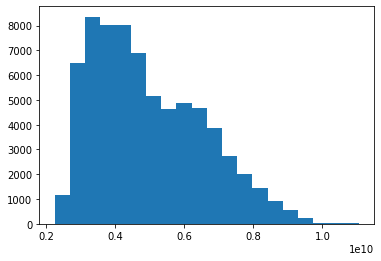

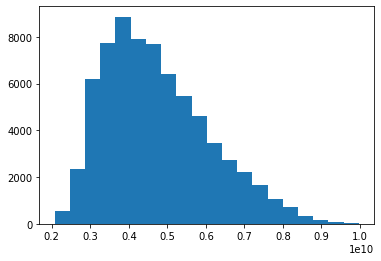

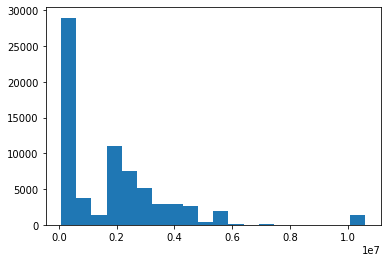

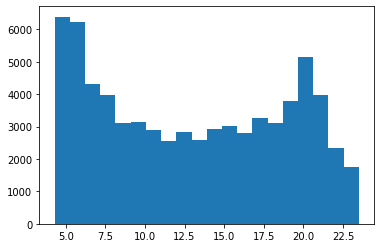

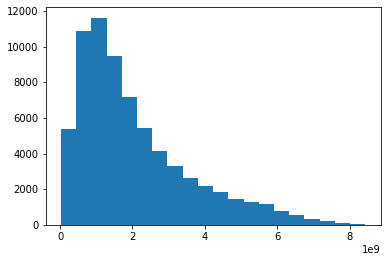

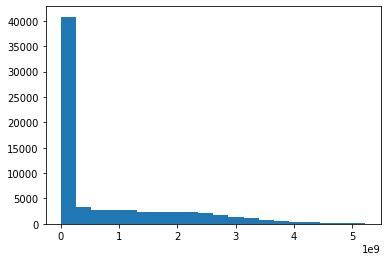

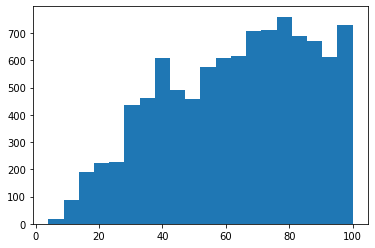

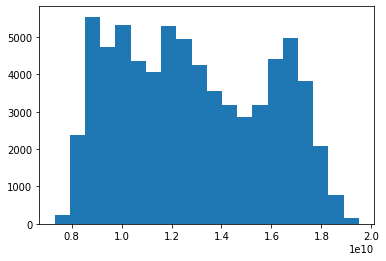

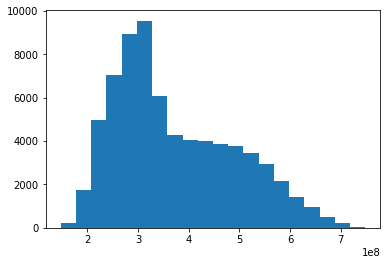

In [50]:
df=feature_engineering(df)

In [ ]:
ss= preprocessing.StandardScaler()
df_scaled=pd.DataFrame(ss.fit_transform(df_reduced.drop(columns=["Date"]).drop(columns=["market-price"])),columns=features)
for feature in features:
    plt.figure()
    plt.hist(df_scaled[feature], bins=20)
    plt.title (feature)
    plt.legend()
    plt.show()
#df_scaled

## readding the targets 
df1 = pd.DataFrame({'market-price': df_reduced["market-price"]})
df1.reset_index(drop = True,inplace=True)

df_centered=pd.concat([df1, df_scaled],axis=1)
#df_centered

# to keep 


In [109]:
print(df.shape)
print(df.describe())

(70128, 33)
                IDS          Mois  Injection RTE (W)  Refoulement RTE (W)  \
count  70128.000000  70128.000000       7.012800e+04         7.012800e+04   
mean   36311.645791      6.523728       3.903467e+10         1.016443e+09   
std    22613.359627      3.448722       9.854703e+09         8.505473e+08   
min        1.000000      1.000000       1.951452e+10         3.570200e+07   
25%    17532.750000      4.000000       3.175362e+10         4.212288e+08   
50%    35064.500000      7.000000       3.736196e+10         7.282295e+08   
75%    52596.250000     10.000000       4.568327e+10         1.330693e+09   
max    87648.000000     12.000000       7.428889e+10         6.377620e+09   

       Pertes modélisées (W)  Consommations totale (W)  \
count           7.012800e+04              7.012800e+04   
mean            2.710008e+09              3.936041e+10   
std             8.737662e+08              9.679018e+09   
min             1.202823e+09              1.974821e+10   
25% 

In [110]:
print(df.columns)

Index(['IDS', 'Horodate_UTC', 'Horodate', 'Mois', 'Injection RTE (W)',
       'Refoulement RTE (W)', 'Pertes modélisées (W)',
       'Consommations totale (W)',
       'Consommation HTA télérelevée à courbe de charge (W)',
       'Consommation totale profilée (W)', 'Consommation HTA profilée (W)',
       'Consommation PME-PMI profilée (W)',
       'Consommation professionnelle profilée (W)',
       'Consommation résidentielle profilée (W)',
       'Production décentralisée totale (W)',
       'Production décentralisée télérelevée à courbe de charge (W)',
       'Production décentralisée profilée (W)',
       'Production photovoltaïque profilée (W)',
       'Production autre profilée (W)',
       'Température réalisée lissée (°Celcius)',
       'Température normale lissée (°Celcius)',
       'Production éolienne totale (W)',
       'Production photovoltaïque totale (W)', 'Pseudo rayonnement',
       'Consommation HTA totale (W)', 'Soutirage net vers autres GRD (W)',
       'RES1_BASE', 

In [111]:
print(df.info(memory_usage='deep'))## dis le vrai usage de mémoire du df 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 33 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   IDS                                                          70128 non-null  int64  
 1   Horodate_UTC                                                 70128 non-null  object 
 2   Horodate                                                     70128 non-null  object 
 3   Mois                                                         70128 non-null  int64  
 4   Injection RTE (W)                                            70128 non-null  int64  
 5   Refoulement RTE (W)                                          70128 non-null  int64  
 6   Pertes modélisées (W)                                        70128 non-null  int64  
 7   Consommations totale (W)                                     70128 non-null 

In [112]:
print(df.memory_usage(deep=True))## stockage par série

Index                                                              128
IDS                                                             561024
Horodate_UTC                                                   5119344
Horodate                                                       5750496
Mois                                                            561024
Injection RTE (W)                                               561024
Refoulement RTE (W)                                             561024
Pertes modélisées (W)                                           561024
Consommations totale (W)                                        561024
Consommation HTA télérelevée à courbe de charge (W)             561024
Consommation totale profilée (W)                                561024
Consommation HTA profilée (W)                                   561024
Consommation PME-PMI profilée (W)                               561024
Consommation professionnelle profilée (W)                       561024
Consom

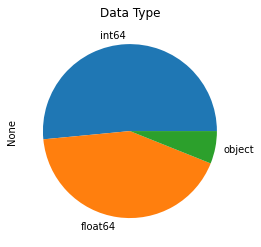

In [113]:
plt.title("Data Type")
df.dtypes.value_counts().plot.pie()# petit camenbert des différents type du dataframe
plt.show()

In [114]:
print((100*df.isna().sum()/df.shape[0]).sort_values(ascending=False))# voir le pourcentage de données manqauntes

Pseudo rayonnement                                             85.905772
PRO2_HP                                                        76.251996
PRO2_HC                                                        76.251996
PRO1_BASE                                                      76.251996
Production photovoltaïque profilée (W)                          0.000000
RES2_HP                                                         0.000000
RES2_HC                                                         0.000000
RES11_BASE                                                      0.000000
RES1_BASE                                                       0.000000
Soutirage net vers autres GRD (W)                               0.000000
Consommation HTA totale (W)                                     0.000000
Production photovoltaïque totale (W)                            0.000000
Production éolienne totale (W)                                  0.000000
Température normale lissée (°Celcius)              

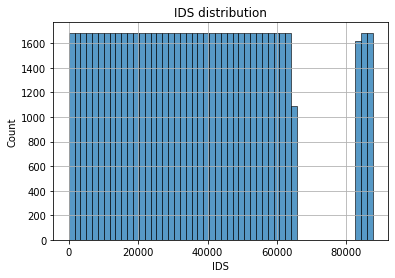

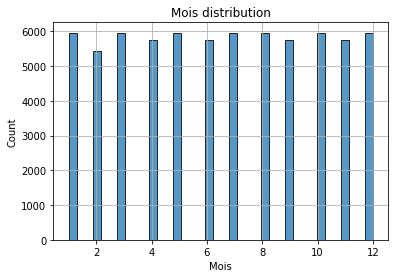

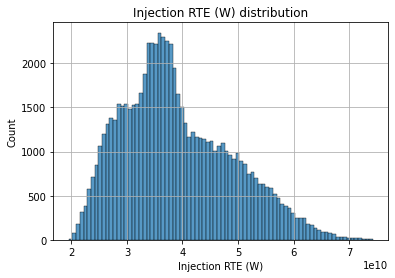

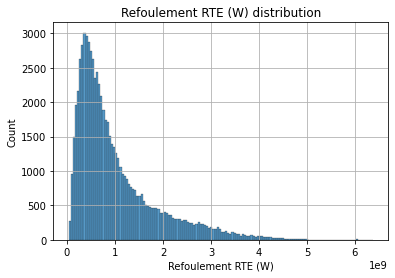

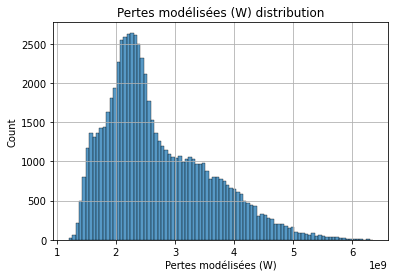

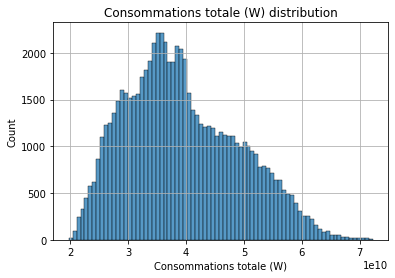

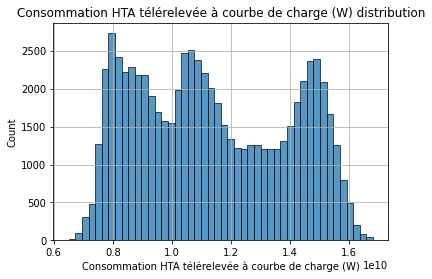

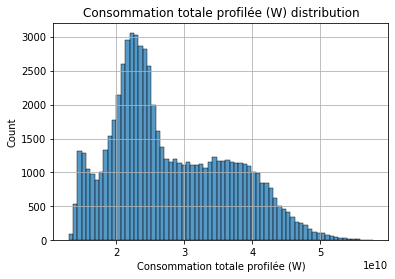

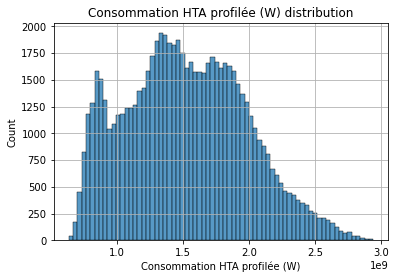

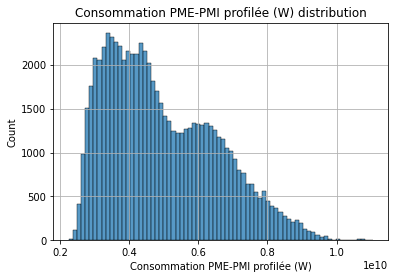

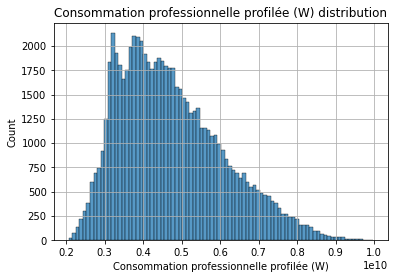

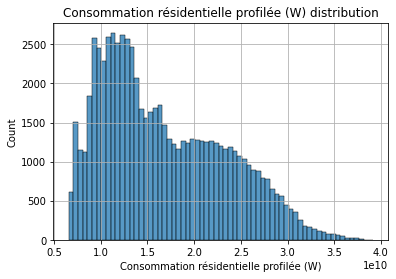

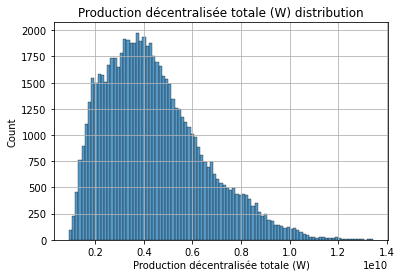

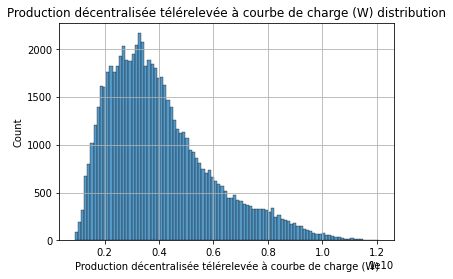

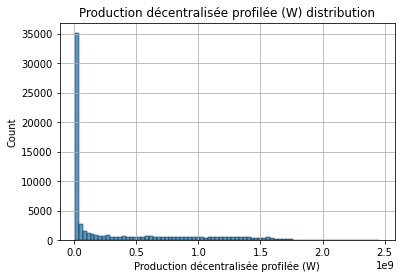

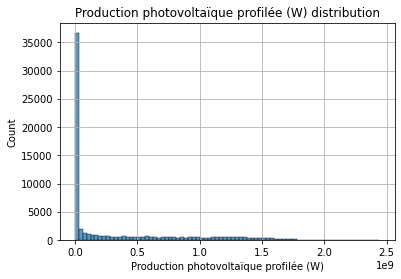

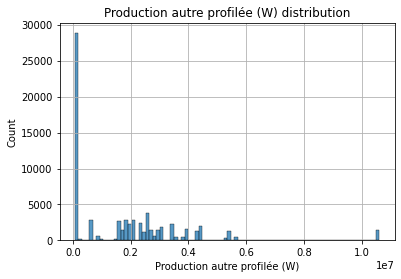

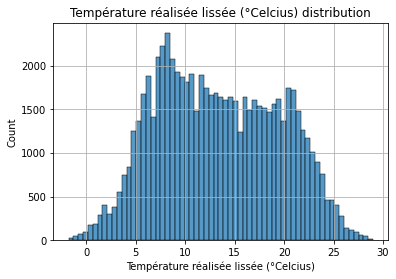

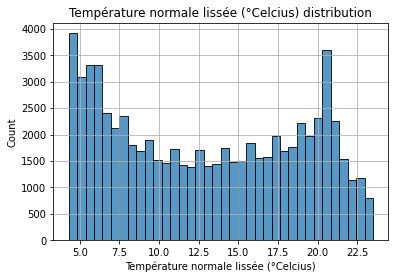

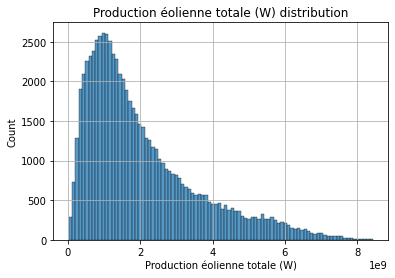

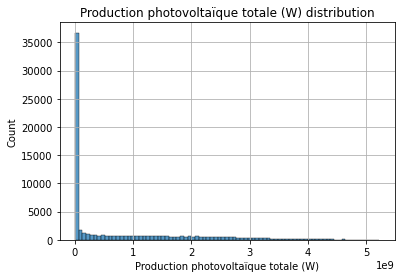

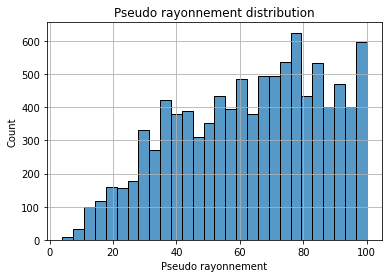

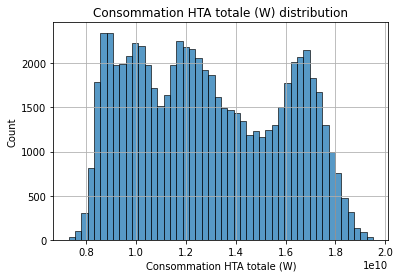

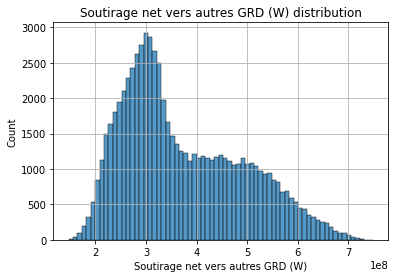

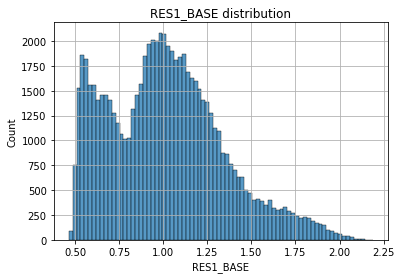

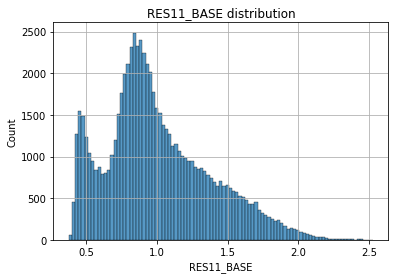

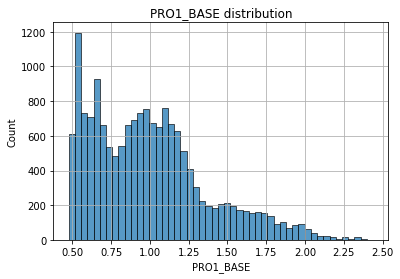

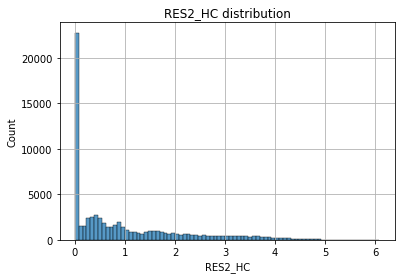

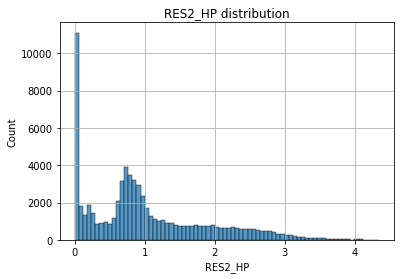

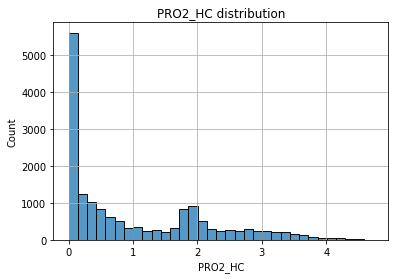

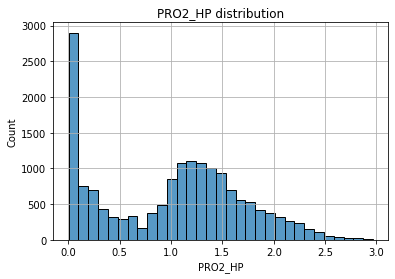

In [115]:
for col in df.select_dtypes(['int','float']):## tu peux aussi faire df.select_dtypes(exclude="object") par exemple
    plt.title(f"{col} distribution")
    sns.histplot(df[col])
    plt.grid()
    plt.show()

We can cleary see that some distrubution look the very same, namely (consommation totale de HTA and consommation totale de HTAtéléversé à la courbe de charge) or (production décentralisée totale et production décentralisée totale téléversée à la courbe de charge), (consommation PME-PMI profilée et consommation résidentielle profilée) to cite only them. 

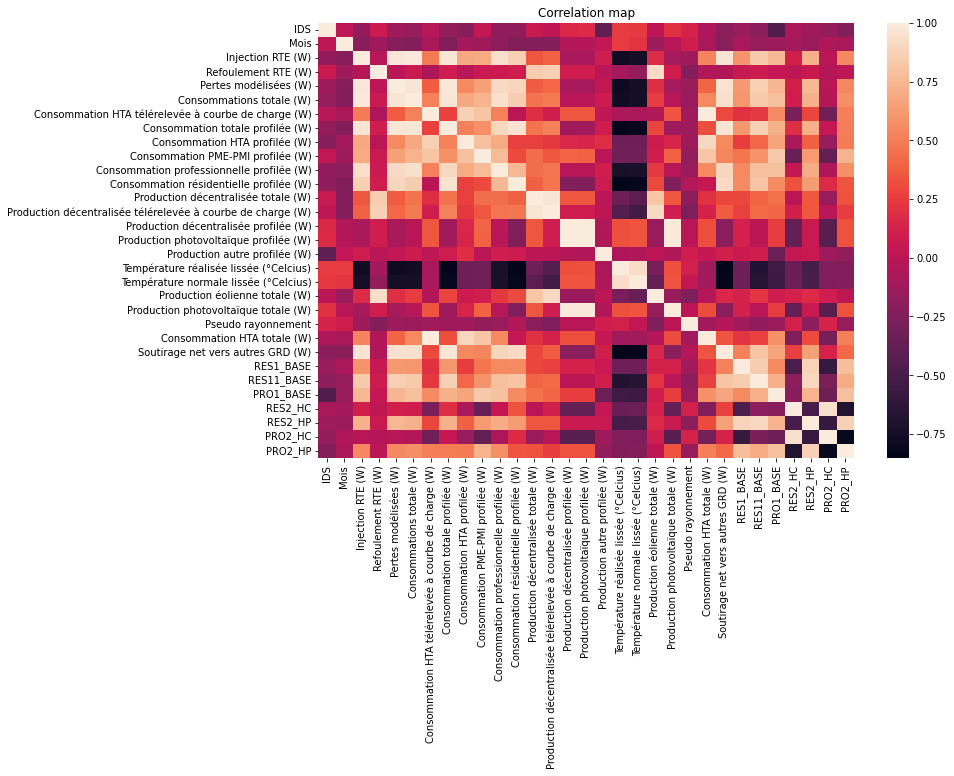

In [116]:
plt.figure(figsize=(12,8))
plt.title("Correlation map")
sns.heatmap(df.corr())
plt.show()

There is many things to say with this correlation map. 
* Pertes modélisées et Consommation totale are strongly correlated which is normal
* Injection totale is strongly correlated with Pertes modélisées, Consommation totale, consommation totale profilée and more generally with every consumption variables, but also with soutirage net vers autres GRD and res11 base and pro1Base
* RES1_ et RES2_HP are the major contributor to total enery consumption. 
* Production totale éolienne et refoulement 
* There is a strong negativ correlation <-0.75 between temperature and total consumption. 
* Production décentralisée and production photovoltaïque are strongly correlated almost 1. 
* RES2_HP seems to be correleted with RES1_BASE and RES11_BASE
* RES2_HC and RES2_PRO strongly correlated.

Can be augmented.

We have to keep those classes apart RES1_BASE, PRO1_BASE, RES2_HP, PRO2_HP : each of those contain a value which correspond to the consumption I supposed. 

Warning hours ! 

In [117]:
import datetime 
def change_date_format(date):
    """We want to have this format for the prophet API : YYYY-MM-DD HH:MM:SS"""
    return datetime.datetime.strptime(date, '%d/%m/%Y %H:%M').strftime('%Y-%m-%d %H:%M:00')
    

In [40]:
df=df[0:65130]

In [54]:
df_indexed=df.set_index("Horodate_UTC")
df_indexed.index = pd.to_datetime(df.set_index("Horodate_UTC").index)
df_indexed["Year"]=df_indexed.index.year
df_indexed["Month"]=df_indexed.index.month.map(lambda x : np.cos(x*2*np.pi/12))
df_indexed["Day"]=df_indexed.index.day.map(lambda x : np.cos(x*2*np.pi/27))
df_indexed["week_day"]=df_indexed.index.weekday.map(lambda x : np.cos(x*2*np.pi/7))

In [22]:
import math
def getxy(hour):
    x = math.sin((180 - hour * 15)/180 * 3.141)
    y = math.cos((180 - hour * 15)/180 * 3.141)
    return x, y


In [71]:
print(len(df_indexed.columns)**2)

1296


In [74]:
corr_matrix=df_indexed.corr()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
p=0
coupled=[]
for index, value in sol.items():
    if value>0.7:
        p+=1
        coupled.append(index)
print(p,"features have more than 90% of correlation over :", len(df_indexed.columns)**2,"features")

65 features have more than 90% of correlation over : 1296 features


/var/folders/bx/6pdhjrtj585cxwwd9nm96q5h0000gn/T/ipykernel_2023/720857630.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))


In [82]:
def keep_relevant_features(df,features):
    myfeatures=features
    
    correlation=df.corr()
    colonnes=df.columns.drop(['Horodate','Mois'])
    #print(colonnes)
    for ligne in colonnes:
        for col in colonnes:
            if 0.9<abs(correlation[ligne][col])<1:
                if col in myfeatures:
                    myfeatures=myfeatures.drop(col)
            elif correlation[ligne][col]==1:
                break
    return myfeatures
            

relevant_feature=keep_relevant_features(df_indexed,df_indexed.columns)
print(relevant_feature)
print(len(relevant_feature),"over", len(df_indexed.columns),"initial features")

Index(['Horodate', 'Mois', 'Consommation PME-PMI profilée (W)',
       'Consommation professionnelle profilée (W)',
       'Production autre profilée (W)',
       'Température normale lissée (°Celcius)',
       'Production éolienne totale (W)',
       'Production photovoltaïque totale (W)', 'Pseudo rayonnement',
       'Consommation HTA totale (W)', 'Soutirage net vers autres GRD (W)',
       'RES1_BASE', 'RES11_BASE', 'PRO1_BASE', 'RES2_HP', 'PRO2_HC', 'PRO2_HP',
       'Year', 'Month', 'Day', 'week_day'],
      dtype='object')
21 over 36 initial features


In [14]:
df_indexed["Hour_X"],df_indexed["Hour_Y"]=zip(*pd.Series(df_indexed.index.hour).map(getxy))

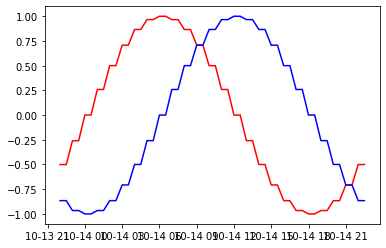

In [18]:
plt.plot(df_indexed["Hour_X"][:50],c='r')
plt.plot(df_indexed["Hour_Y"][:50],c='b')

In [120]:
min_year=df_indexed.index.year.min()
max_year=df_indexed.index.year.max()
print("min year", df_indexed.index.year.min())
print("max year",df_indexed.index.year.max())
colormap=plt.cm.gist_ncar
colost=[colormap(i) for i in np.linspace(0,0.95,1+max_year-min_year)]## make a nice colorbar

min year 2013
max year 2017


In [121]:
for i in range(min_year,max_year+1,1):
    print(f"nb measures of year {i} : {len(df_indexed[df_indexed['Year']==i])}")

nb measures of year 2013 : 3796
nb measures of year 2014 : 17520
nb measures of year 2015 : 17520
nb measures of year 2016 : 17568
nb measures of year 2017 : 8726


In [122]:
to_be_predicted = df.columns[-7:]

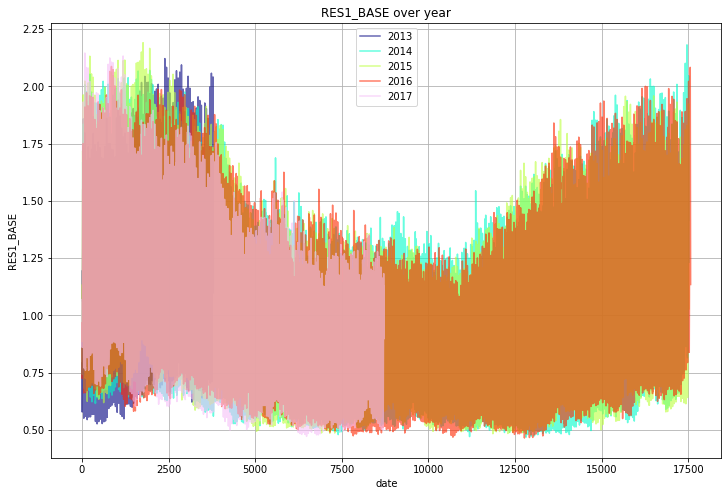

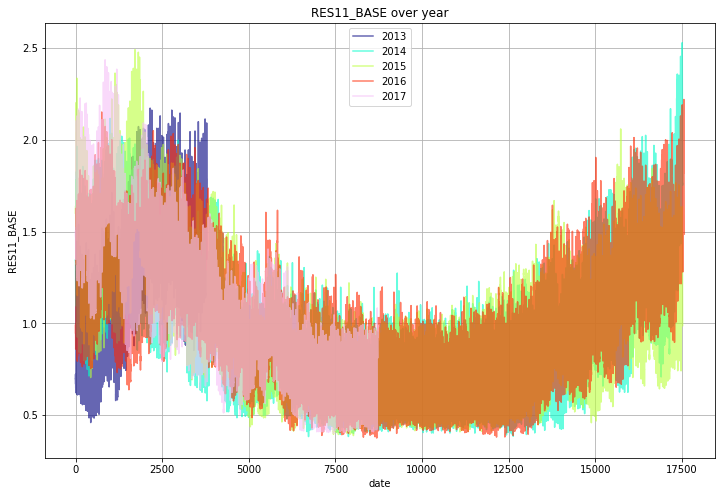

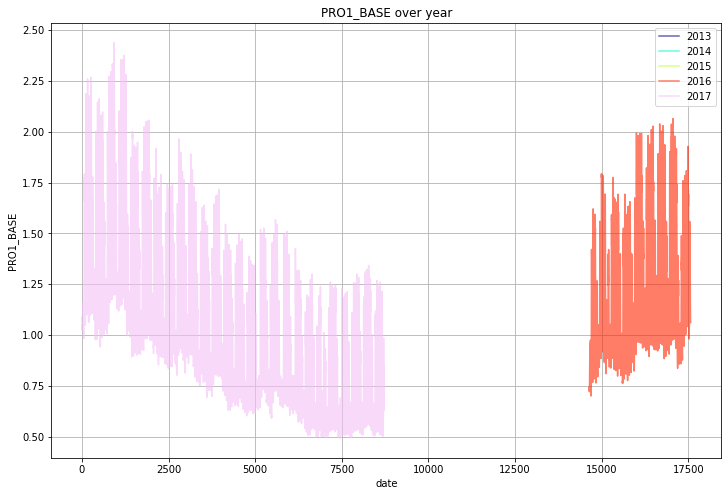

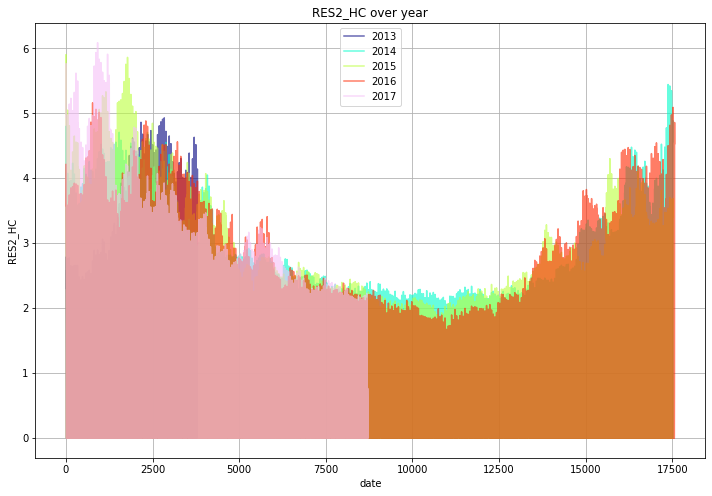

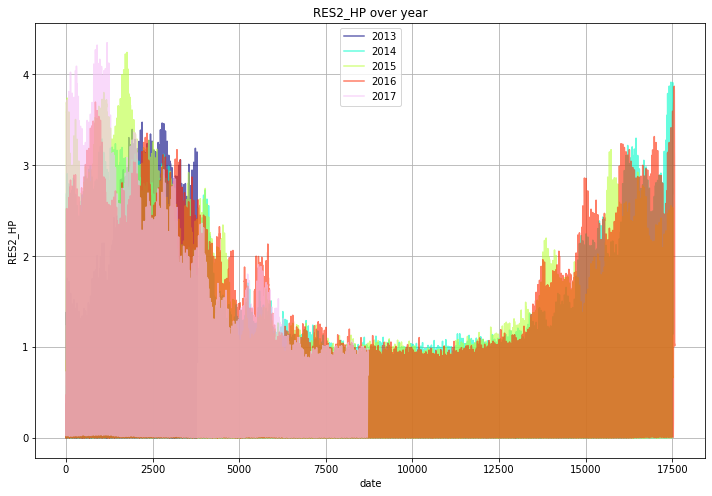

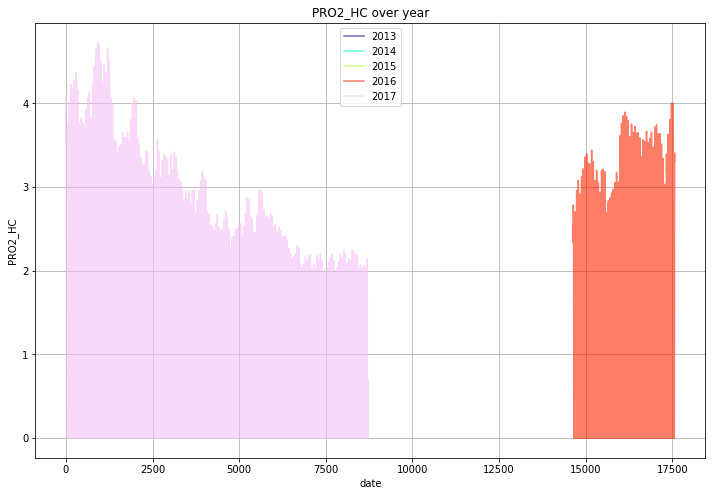

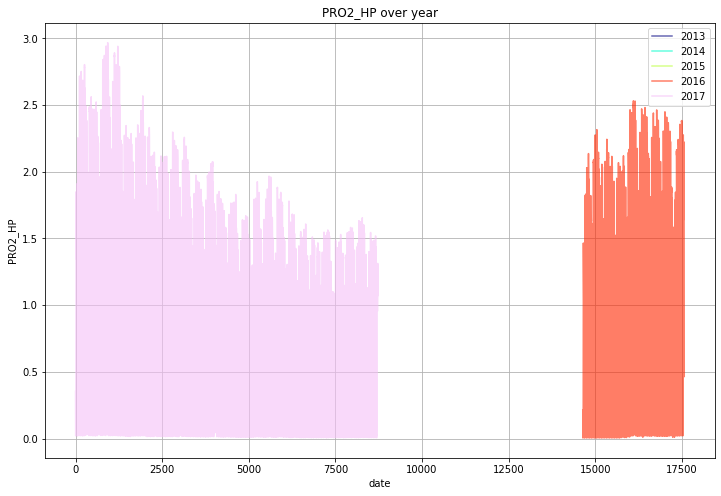

In [123]:
for column in to_be_predicted :
    plt.figure(figsize=(12,8))
    for i in range(min_year,max_year+1,1):
        plt.plot(df_indexed[df_indexed["Year"]==i][column].values,color=colost[i-min_year],label=i,alpha=0.6)
    plt.title(f"{column} over year")
    plt.legend()
    plt.xlabel("date")
    plt.ylabel(f"{column}")
    plt.grid()
    plt.show()

In [198]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [125]:
from sklearn.model_selection import TimeSeriesSplit

In [152]:
splitter = TimeSeriesSplit(n_splits=2,test_size=8726)
for train_idx, test_idx in splitter.split(df_indexed):
    df_train, df_test = df_indexed.iloc[:train_idx[-1]],df_indexed.iloc[train_idx[-1]:]

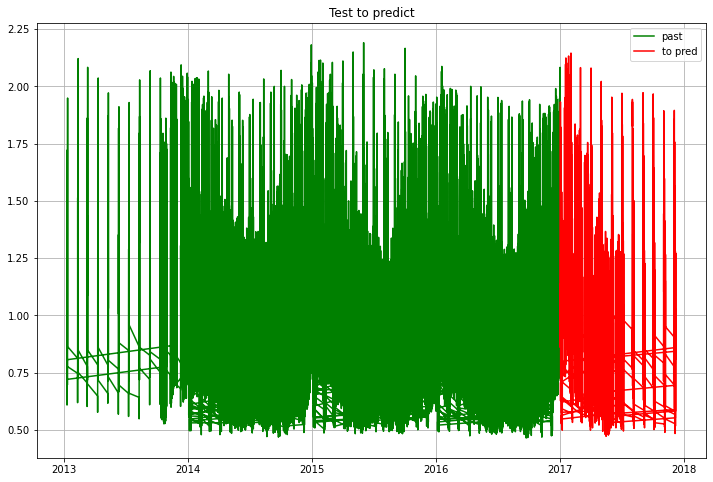

In [157]:
plt.figure(figsize=(12,8))
plt.plot(df_train[to_be_predicted[0]],color="g",label="past")
plt.plot(df_test[to_be_predicted[0]],color="r",label="to pred")
plt.grid()
plt.title("Test to predict")
plt.legend()
plt.show()

In [158]:
from sklearn.metrics import mean_squared_error

In [206]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluate_arima_model(X_train, X_test, arima_order):
    """
    Train, predict and evaluate ARIMA model

    Arguments:
    ----------
    - X_train: numpy array
        - train set
    - X_test: numpy array
        - test set
    - arima_order: tuple
        - (p,d,q)

    Returns:
    --------
    - error: float
        - RMSE
    - predictions: numpy array
        - output predictions
    """

    history = [x for x in X_train]
    # make predictions
    predictions = list()
    
    for t in range(len(X_test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit() 
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(X_test.values[t])

    # calculate out of sample error
    error = rmse(X_test, predictions)
    print(error)

    return error, predictions


# evaluate combinations of p, d and q values for an ARIMA model
def arima_grid_search(X_train, X_test, p_values, d_values, q_values):
    """
    grid search of arguments

    Arguments:
    ----------
    - X_train: numpy array
        - train set
    - X_test: numpy array
        - test set
    - p_values: numpy_array
        - a list of values for p parameter
    - d_values: numpy_array
        - a list of values for d parameter
    - q_values: numpy_array
        - a list of values for q parameter

    Returns:
    --------
    - best_cfg: tuple
        - best model parameter (p,d,q)
    - best_score: numpy array
        -  best rmse score
    """

    best_score, best_cfg = float("inf"), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                print(order)
                try:
                    rmse, _ = evaluate_arima_model(X_train, X_test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print("ARIMA(%d,%d,%d) RMSE=%.3f" % (p, d, q, rmse))

                except:
                    print("except rises")

    print("Best ARIMA%s MSE=%.3f" % (best_cfg, best_score))

    return best_cfg, best_score

In [207]:
evaluate_arima_model(df_train[to_be_predicted[0]],df_test[to_be_predicted[0]],(2,1,2))

ok


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ok


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ok


KeyboardInterrupt: 

In [196]:
best_cfg,best_score=arima_grid_search(df_train[to_be_predicted[0]],df_test[to_be_predicted[0]],np.array([2]),np.array([1]),np.array([2]))

(2, 1, 2)
(56403,)
except rises
Best ARIMANone MSE=inf


## Arimax model using the Sarimax method (no seasonal order )

In [214]:
def evaluate_arimax_model(X_train, X_test, arima_order, exogenous_var_train, exogenous_var_test):
 
    mycolonne=exogenous_var_train.columns
    history = [x for x in X_train]
    exog=np.array([[x for x in exogenous_var_train[elt]] for elt in exogenous_var_train.columns]).T.tolist()
    exog_test=np.array([[x for x in exogenous_var_test[elt]] for elt in exogenous_var_test.columns]).T.tolist()
    # make predictions
    predictions = list()

    for t in range(len(X_test)):
        model = SARIMAX(endog=history, order=arima_order, exog=exog,enforce_stationarity=False)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast(steps=1,exog=[exog_test[t]])
        predictions.append(yhat[0])
        history.append(X_test.values[t])
        exog.append(exog_test[t])
        print("coucou")
    error = rmse(X_test, predictions)

    return error, predictions

def arimax_grid_search(X_train, X_test, p_values, d_values, q_values, exogenous_var_train, exogenous_var_test):


    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse, _ = evaluate_arimax_model(
                        X_train, X_test, order, exogenous_var_train, exogenous_var_test)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print("ARIMAX(%d,%d,%d) RMSE=%.3f Exogenous =" %
                          (p, d, q, rmse))

                except:
                    continue

    print("Best ARIMAX%s MSE=%.3f" % (best_cfg, best_score))

    return best_cfg, best_score

In [238]:
Xtrain=df_train[to_be_predicted[0]]
Xtest=df_test[to_be_predicted[0]]
Xtrain_exo=df_train[['Température réalisée lissée (°Celcius)', 'Production éolienne totale (W)']]
Xtest_exo= df_test[['Température réalisée lissée (°Celcius)', 'Production éolienne totale (W)']]
best_cfg,best_score=arimax_grid_search(Xtrain,Xtest,np.arange(2),np.arange(2),np.arange(2),Xtrain_exo,Xtest_exo)